<h1><font color=”blue”>Training YOLOv3 FOR SVHN dataset**, 10 class training</font></h1>

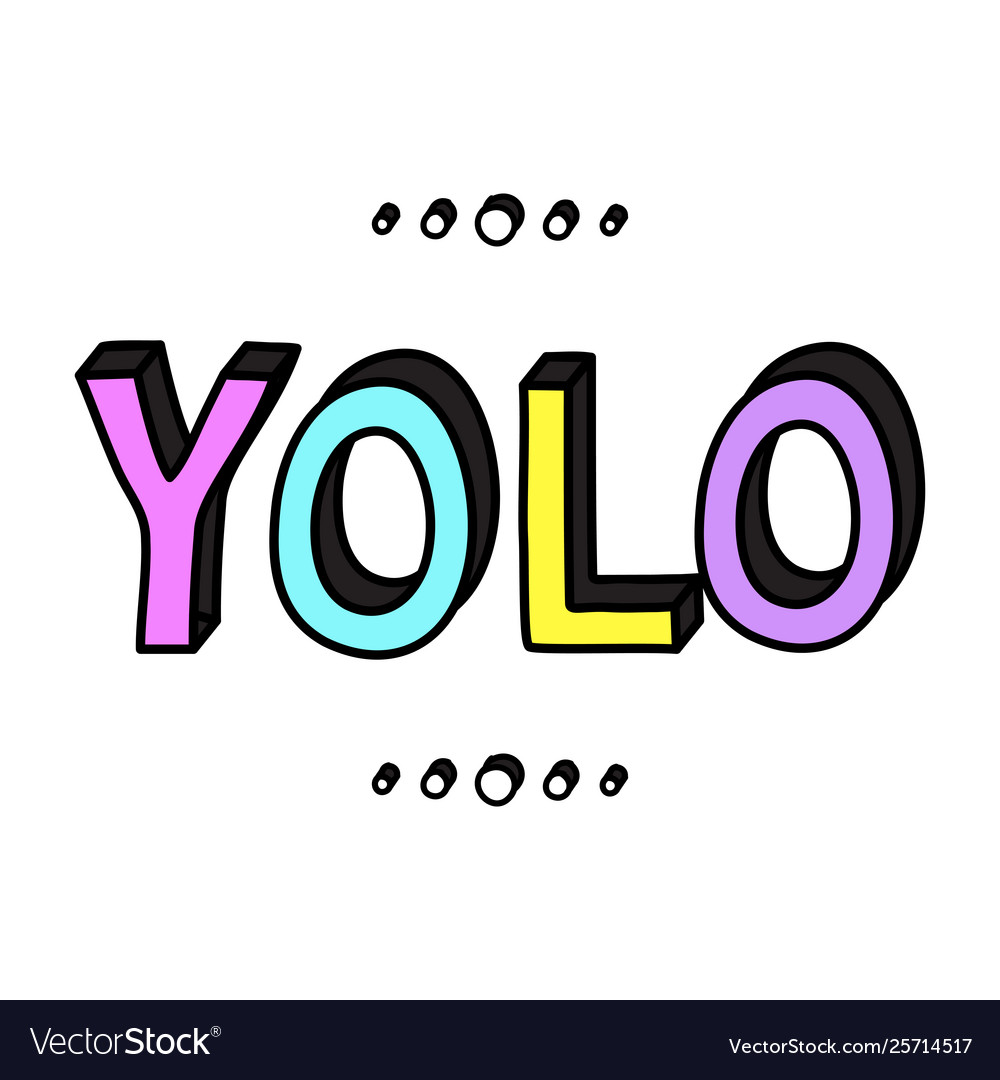

This example has 4 parts-

1.   Creating and transforming custom data to yolo format
2.   Prepairing training configuration files
3.   Training in google calab
4.    Downloading the weights from step 3 to local system and perform predictions.



<h1>Step 1 --> Creating and labelling our data set in yolo format.</h1>

<h1><font color=”blue”>Data labelling completed using LABELIMG tool in local system</font></h1>

<h1>Step 2 --> Prepairing training configuration files</h1>

clonning the repo under "**content**" folder

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

print current working directory to check the folder structure. Once the repo is cloned, we will see darknet folder under content

In [ ]:
import os
print(os.getcwd())

change directory to /content/darknet

In [ ]:
os.chdir("/content/darknet")

In [ ]:
print(os.getcwd())

Repostory cloned from git hub will have below folder structure-

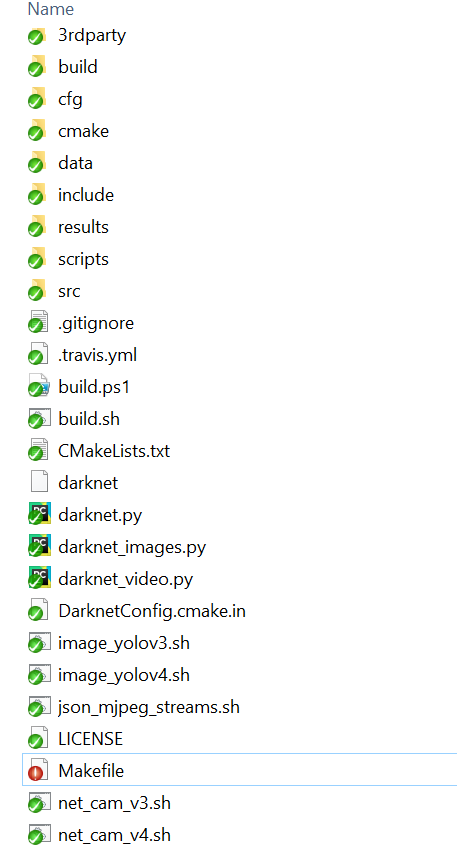

As we know that yolo uses darknet framework which is written on c, so we have to compile the binary files to create executable file that is "darknet.exe"

Repository which we have cloned has everything available and we can directly execute/compile the binary files using **make** function. However "**Makefile**" available with the original repository is configured to use "**CPU**" but we want our code to be executed using "**GPU**". So we have to update the first line of "Makefile" to GPU=1, so that the generated executable file will use "GPU"

Once new "**Makefile**" is available in colab, compile the code using below option

In [ ]:
#before compiling, update Makefile--> GPU=1
!make

**Below step is to verify is darknet was installed and compiled successfully in server.**

In [ ]:
#verying the darknet installation

!./darknet 

We require pretrained weights from yolo since we are using transfer learning. For this purpose, create a new folder  named "**weights**" using below command. Please note that you are under "/content/darknet" folder. So the new folder will get created under darknet folder. you can verify this from folder structure on the left.

In [ ]:
#manually creating weights folder
os.mkdir("weights") # creating directory
os.chdir("weights") # switching current path to weights folder

Now we are downloading the pretrained weights to our **weights** folder under /content/darknet/ directory

In [ ]:
#downloading the darknet weights to weights folder in colab drive
!wget https://pjreddie.com/media/files/darknet53.conv.74

once downloaded, change the directory to darknet folder

In [ ]:
os.chdir("/content/darknet")

In [ ]:
print(os.getcwd()) # verify current path

In [ ]:
# os.listdir('/usr/local/cuda-10.0/bin') # ignore this

for training darknet, we require below configuration files-


1.   custom_data.dat (contains details about other required files. This is more like a metadata file)
2.   train.cfg (contains image names with path)
3.   dataset in yolo format (contains image and yolo format text files.)
4.   backup folder to save weights. (should already be available with github repo. if not create it manually)
5.   classes.names (contains class names such as cat, dog, car)
6.   classes.txt (i believe this is optional)

Step 3-->Once we have our setup ready, executing the darknet code

In [ ]:
!./darknet detector train cfg/custom_data.data cfg/yolov3_SVHM_train-v2.cfg backup/yolov3_SVHM_train-v2_final.weights

we have configured our yolov3_SVHN_test-v2.cfg to have 400 iterations with 64 batche size. 

**Testing**

we have successfully trained out model on SVHM dataset

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/darknet/backup/yolov3_SVHM_train-v2_final.weights')

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/darknet/predictions.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
!./darknet detector test cfg/custom_data.data cfg/yolov3_SVHM_train-v2.cfg backup/yolov3_SVHM_train-v2_final.weights /content/test34.png -thresh 0.30

testing after 80 iterations

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/darknet/predictions.jpg')
imgplot = plt.imshow(img)
plt.show()

testing after 120 iterations

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/darknet/predictions.jpg')
imgplot = plt.imshow(img)
plt.show()

Testing after 150 iterations

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/darknet/predictions.jpg')
imgplot = plt.imshow(img)
plt.show()